In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from global_land_mask import globe
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

In [117]:
h = '/media/rakshith/Seagate Expansion Drive/mraks/TGMS ERA 1959-2021, India only.nc'
ds = xr.open_dataset(h)

In [118]:
lon_grid, lat_grid = np.meshgrid(ds.longitude, ds.latitude)
mask = globe.is_land(lat_grid, lon_grid)

In [119]:
jjas = ds.time.dt.month.isin(range(6, 7)) #June
jjas1 = ds.time.dt.month.isin(range(9, 10)) #September
clim = ds.sel(time=jjas)
clim1 = ds.sel(time=jjas1)
clim3 = clim.where(mask>0).mean(dim=['latitude', 'longitude'])
clim4 = clim1.where(mask>0).mean(dim=['latitude', 'longitude'])

In [120]:
Qnet = clim3.mtnswrf + clim3.mtnlwrf
P = 86400*28.96*(clim3.mtpr+clim3.mer)
Pwat = clim3.tcwv

Qnet1 = clim4.mtnswrf + clim4.mtnlwrf
P1 = 86400*28.96*(clim4.mtpr+clim4.mer)
Pwat1 = clim4.tcwv

In [128]:
ratio = np.divide(P, Qnet)
ratio1 = np.divide(P1, Qnet1)

Text(0.5, 0.98, 'Indian region, ERA5')

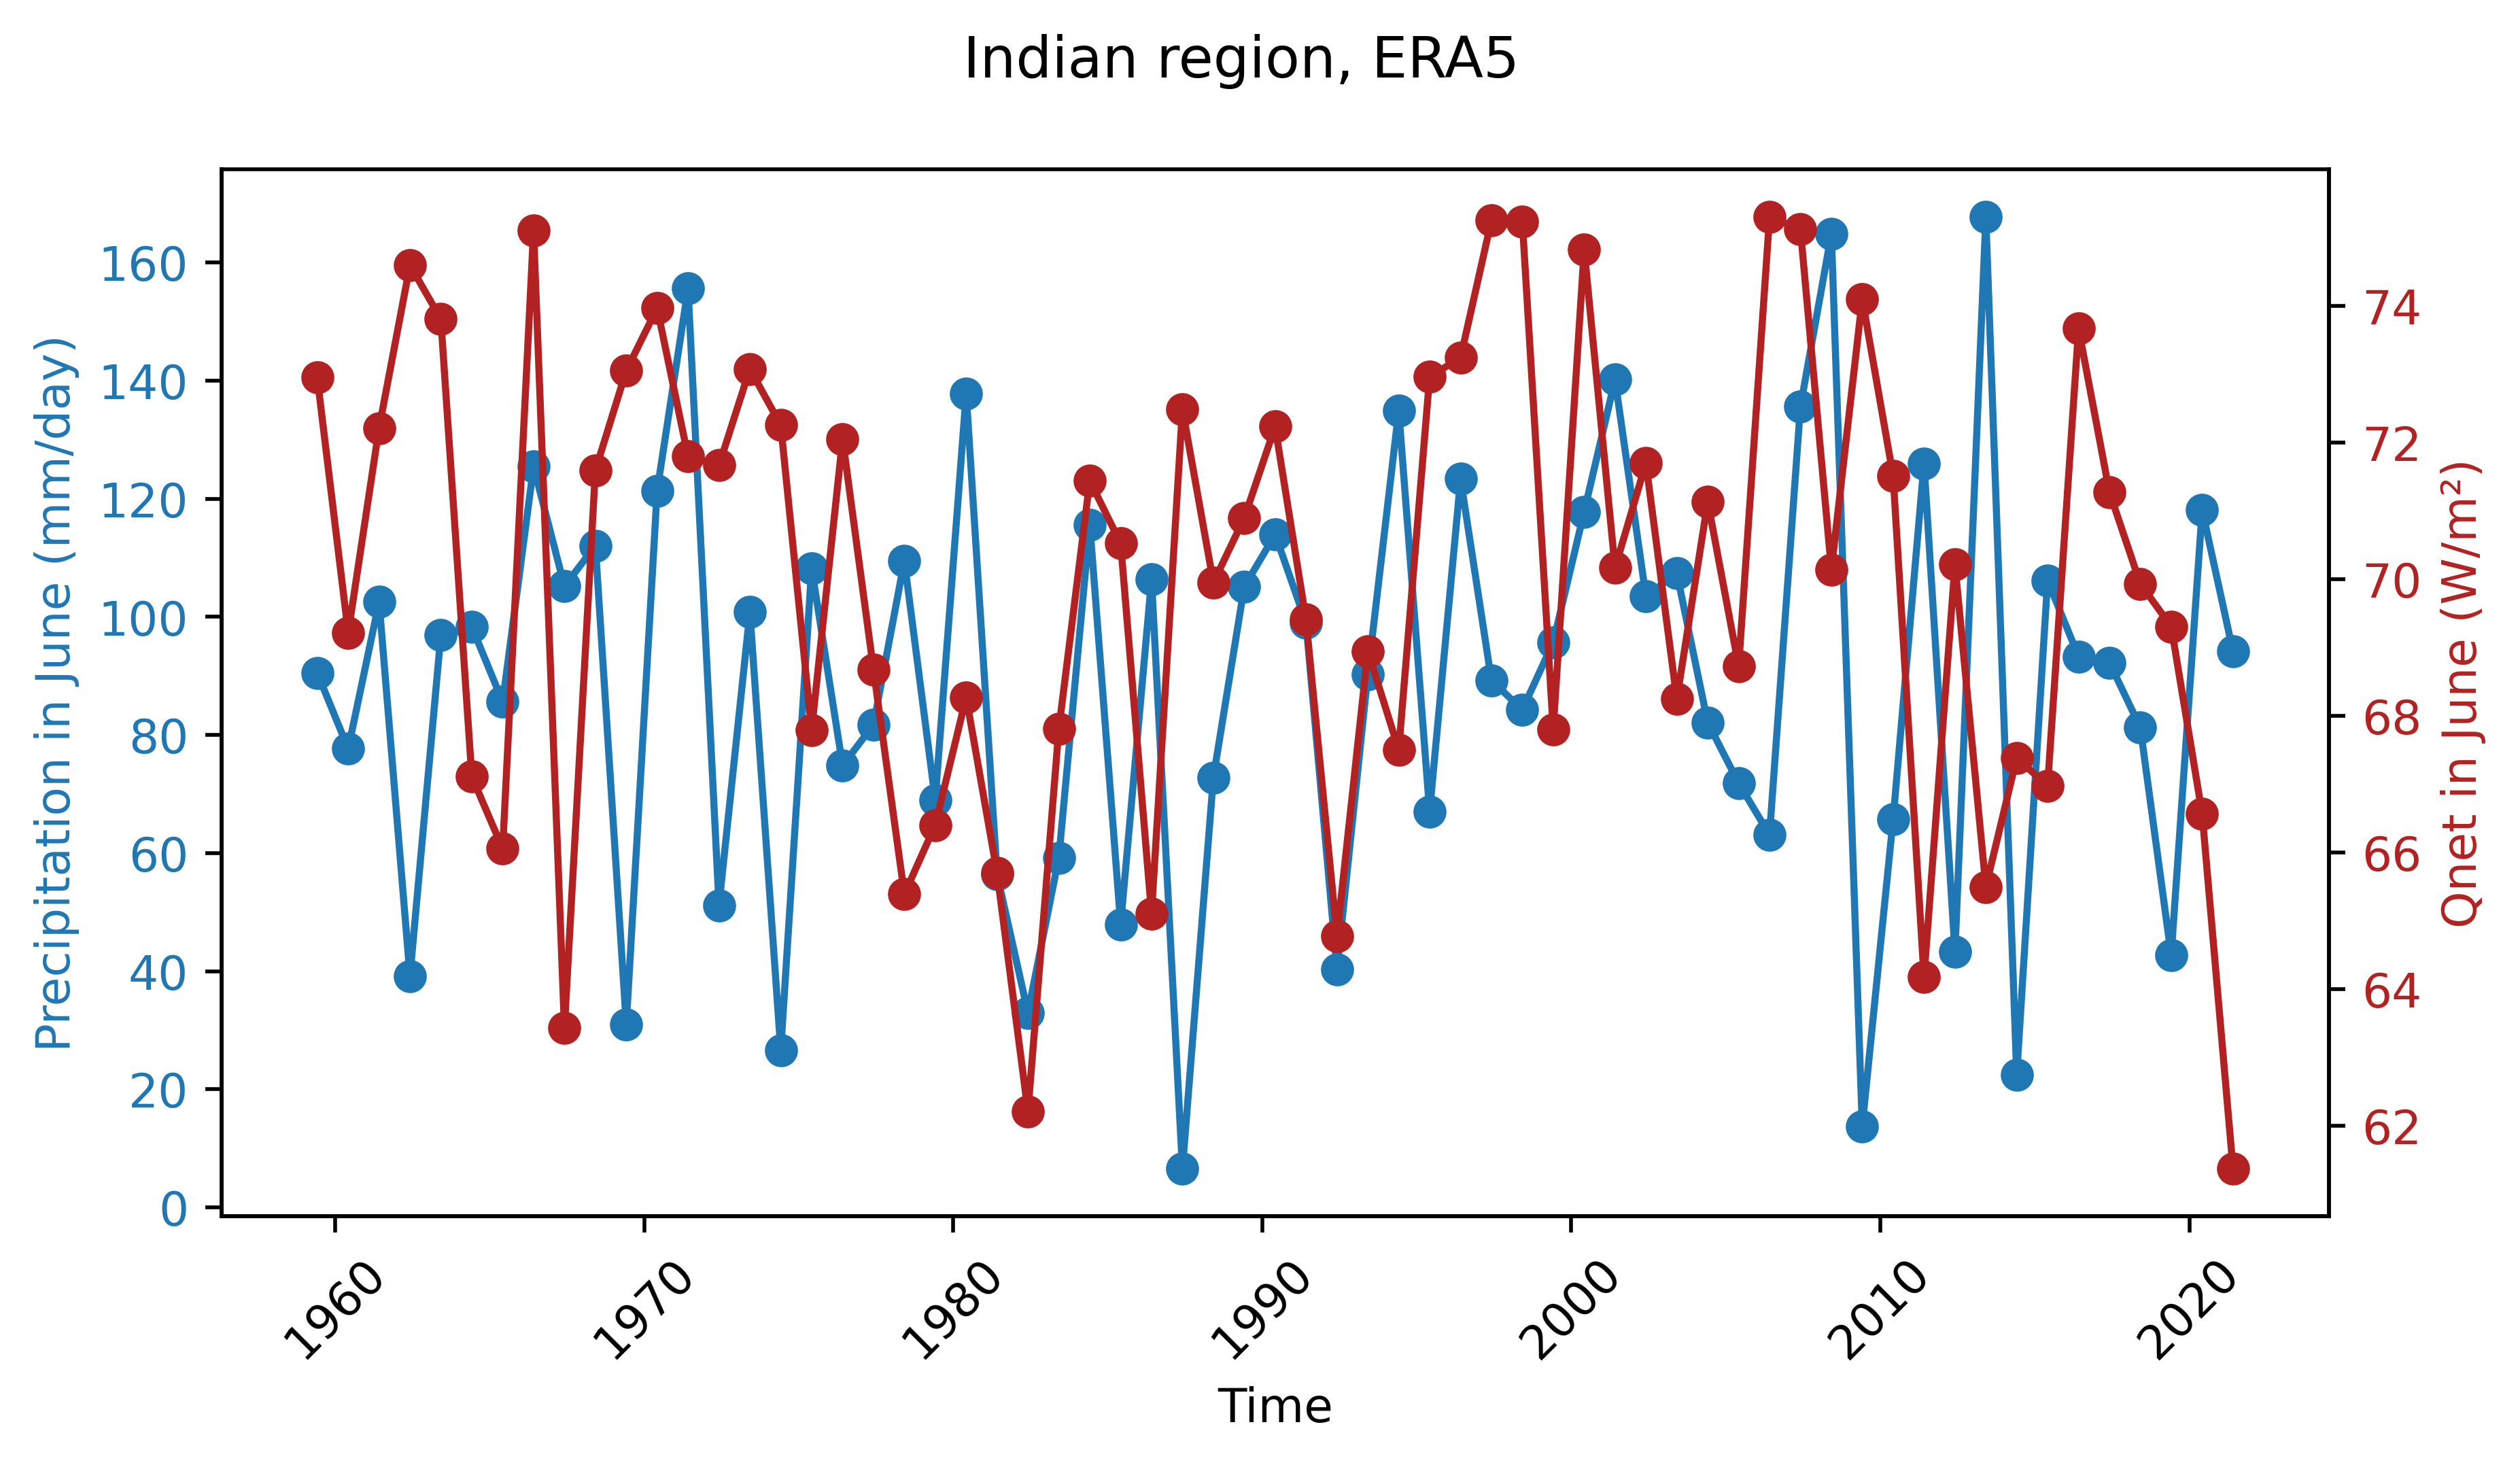

In [122]:
fig, ax1 = plt.subplots(figsize=(8,4))
ax1.plot(P.time, P, marker='o')
ax1.set_xlabel('Time')
ax1.set_ylabel('Precipitation in June (mm/day)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.spines['top'].set_visible(False)
ax1.tick_params(axis='x', labelrotation = 45)

ax2 = ax1.twinx()

ax2.plot(P.time, Qnet, color='firebrick', marker='o')
ax2.set_ylabel('Qnet in June (W/m\u00b2)', color='firebrick')
ax2.tick_params(axis='y', labelcolor='firebrick')
#ax2.spines['top'].set_visible(False)

plt.suptitle('Indian region, ERA5')

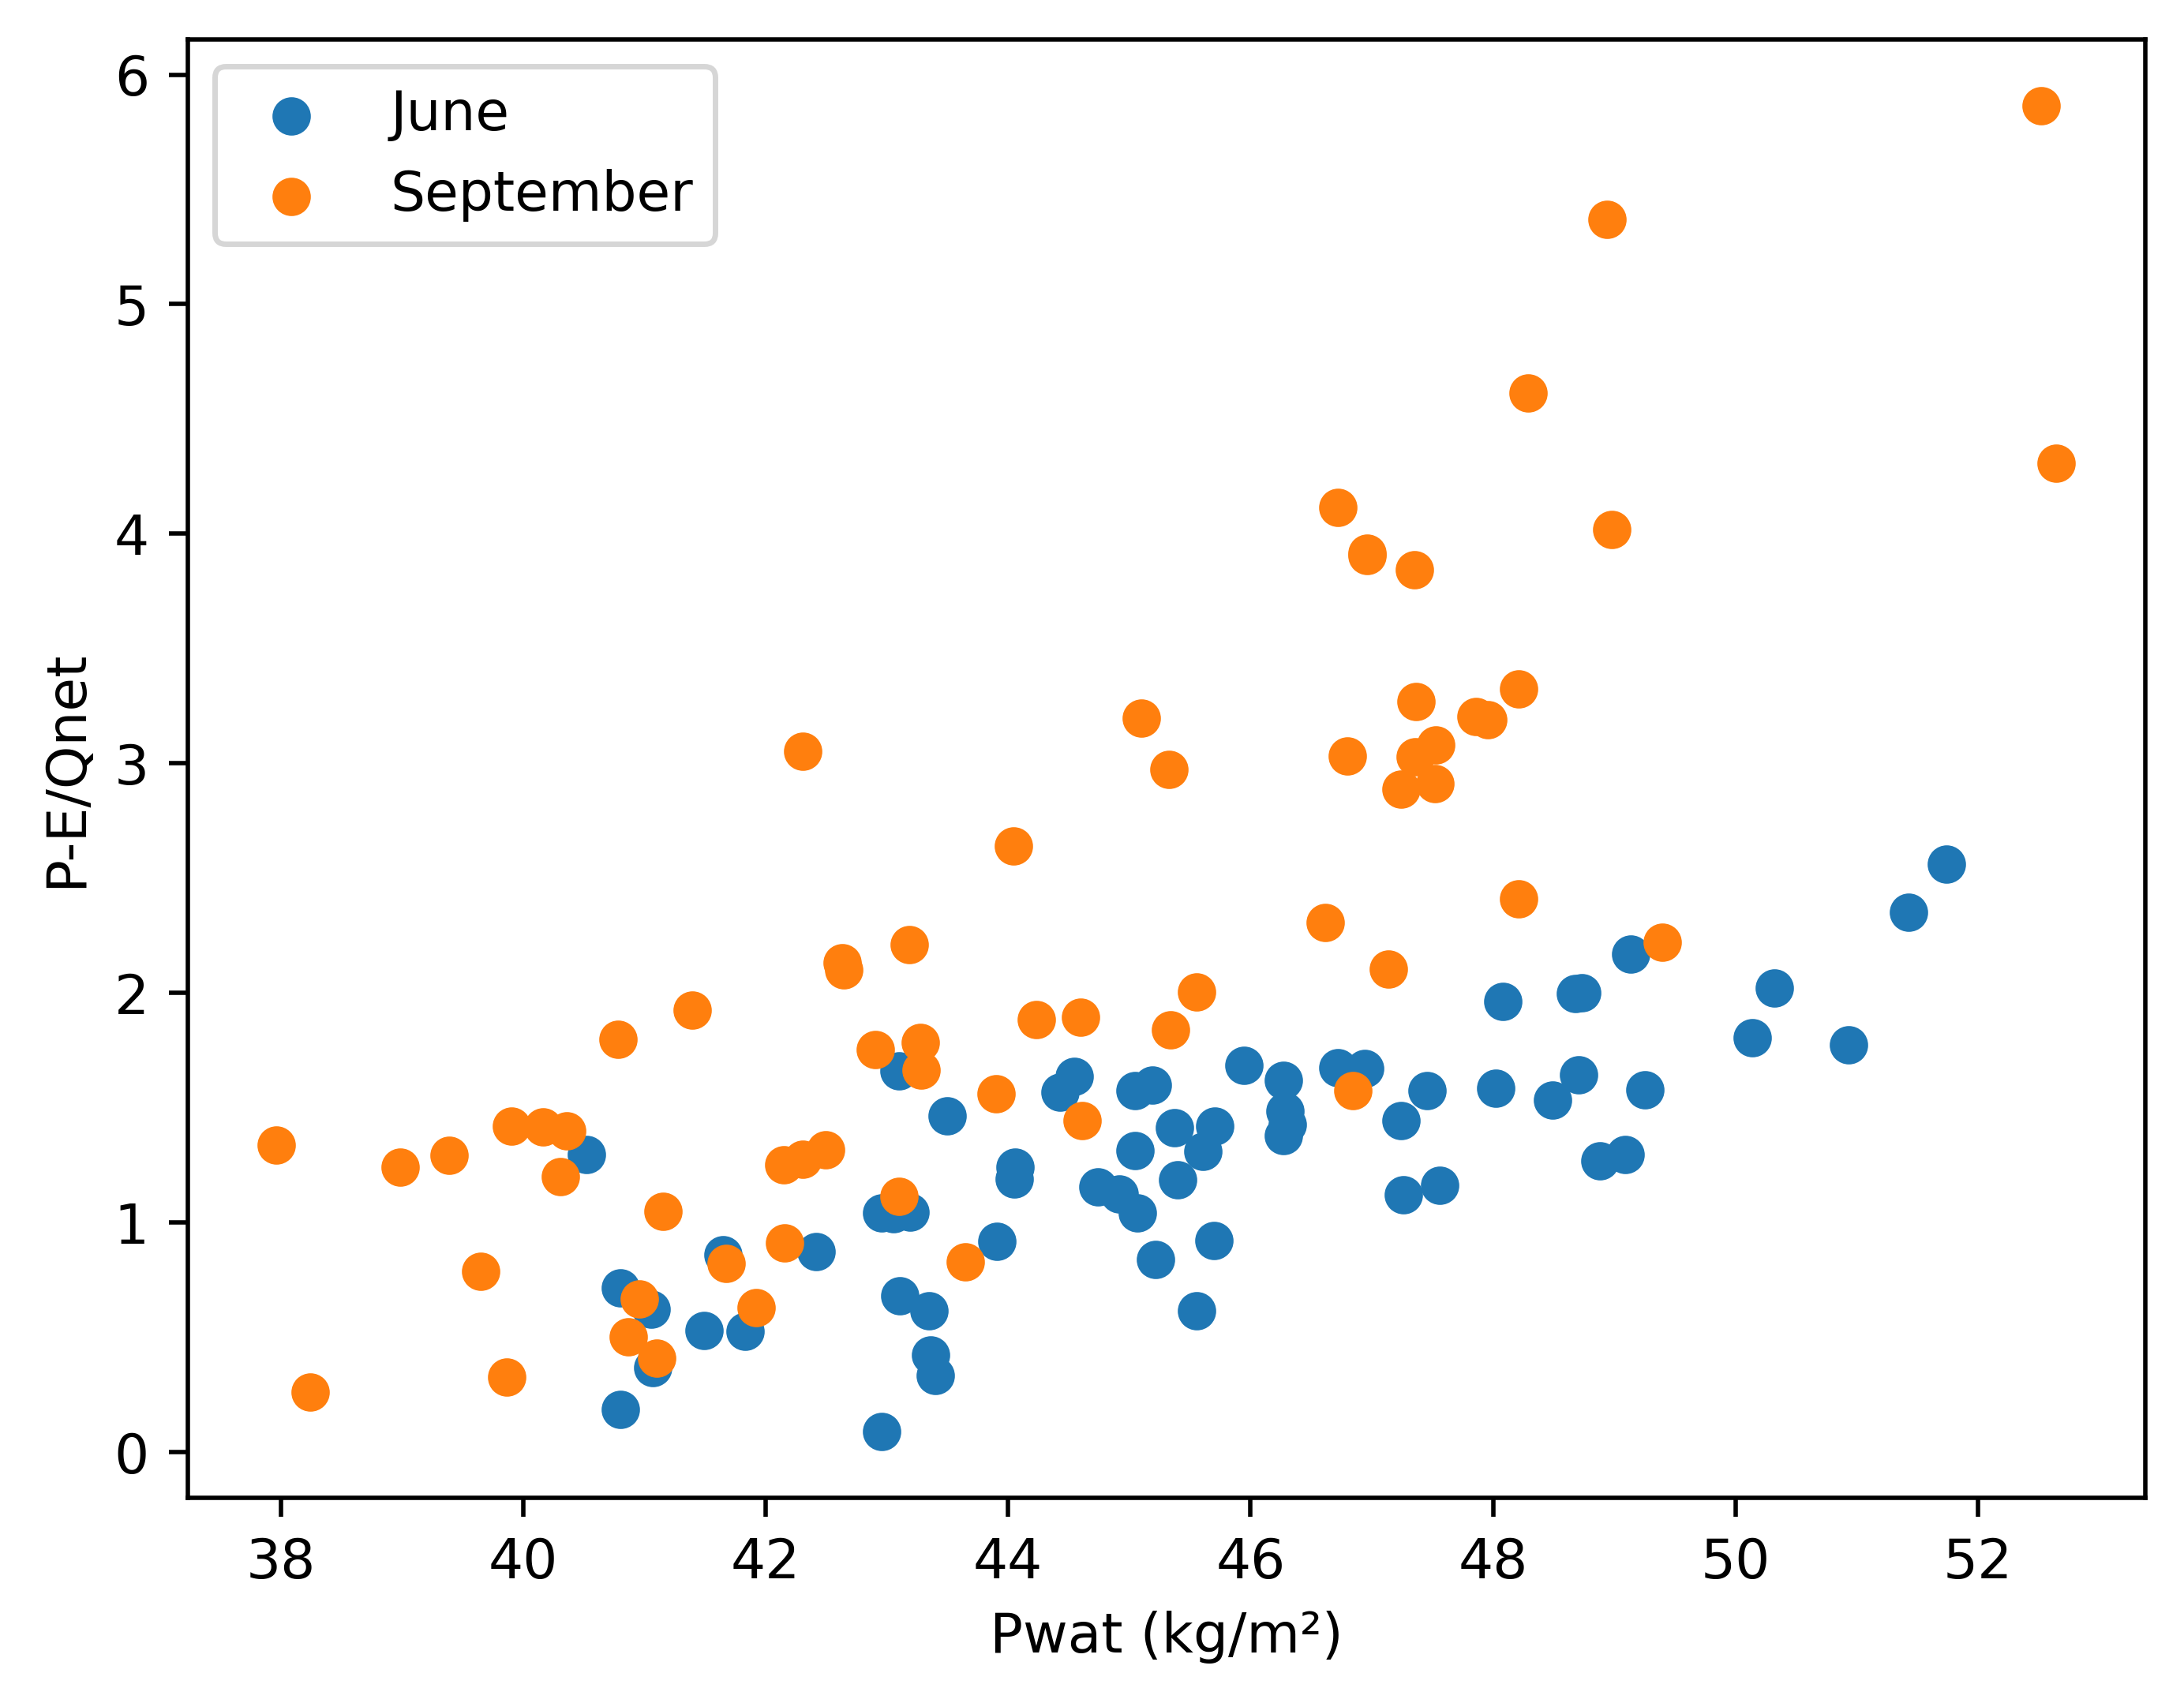

In [130]:
plt.scatter(Pwat, ratio, label='June')
plt.scatter(Pwat1, ratio1, label='September')
plt.xlabel('Pwat (kg/m\u00b2)')
plt.ylabel('P-E/Qnet')
plt.legend()

In [131]:
TGMS = np.divide(Qnet, P)
TGMS1 = np.divide(Qnet1, P1)

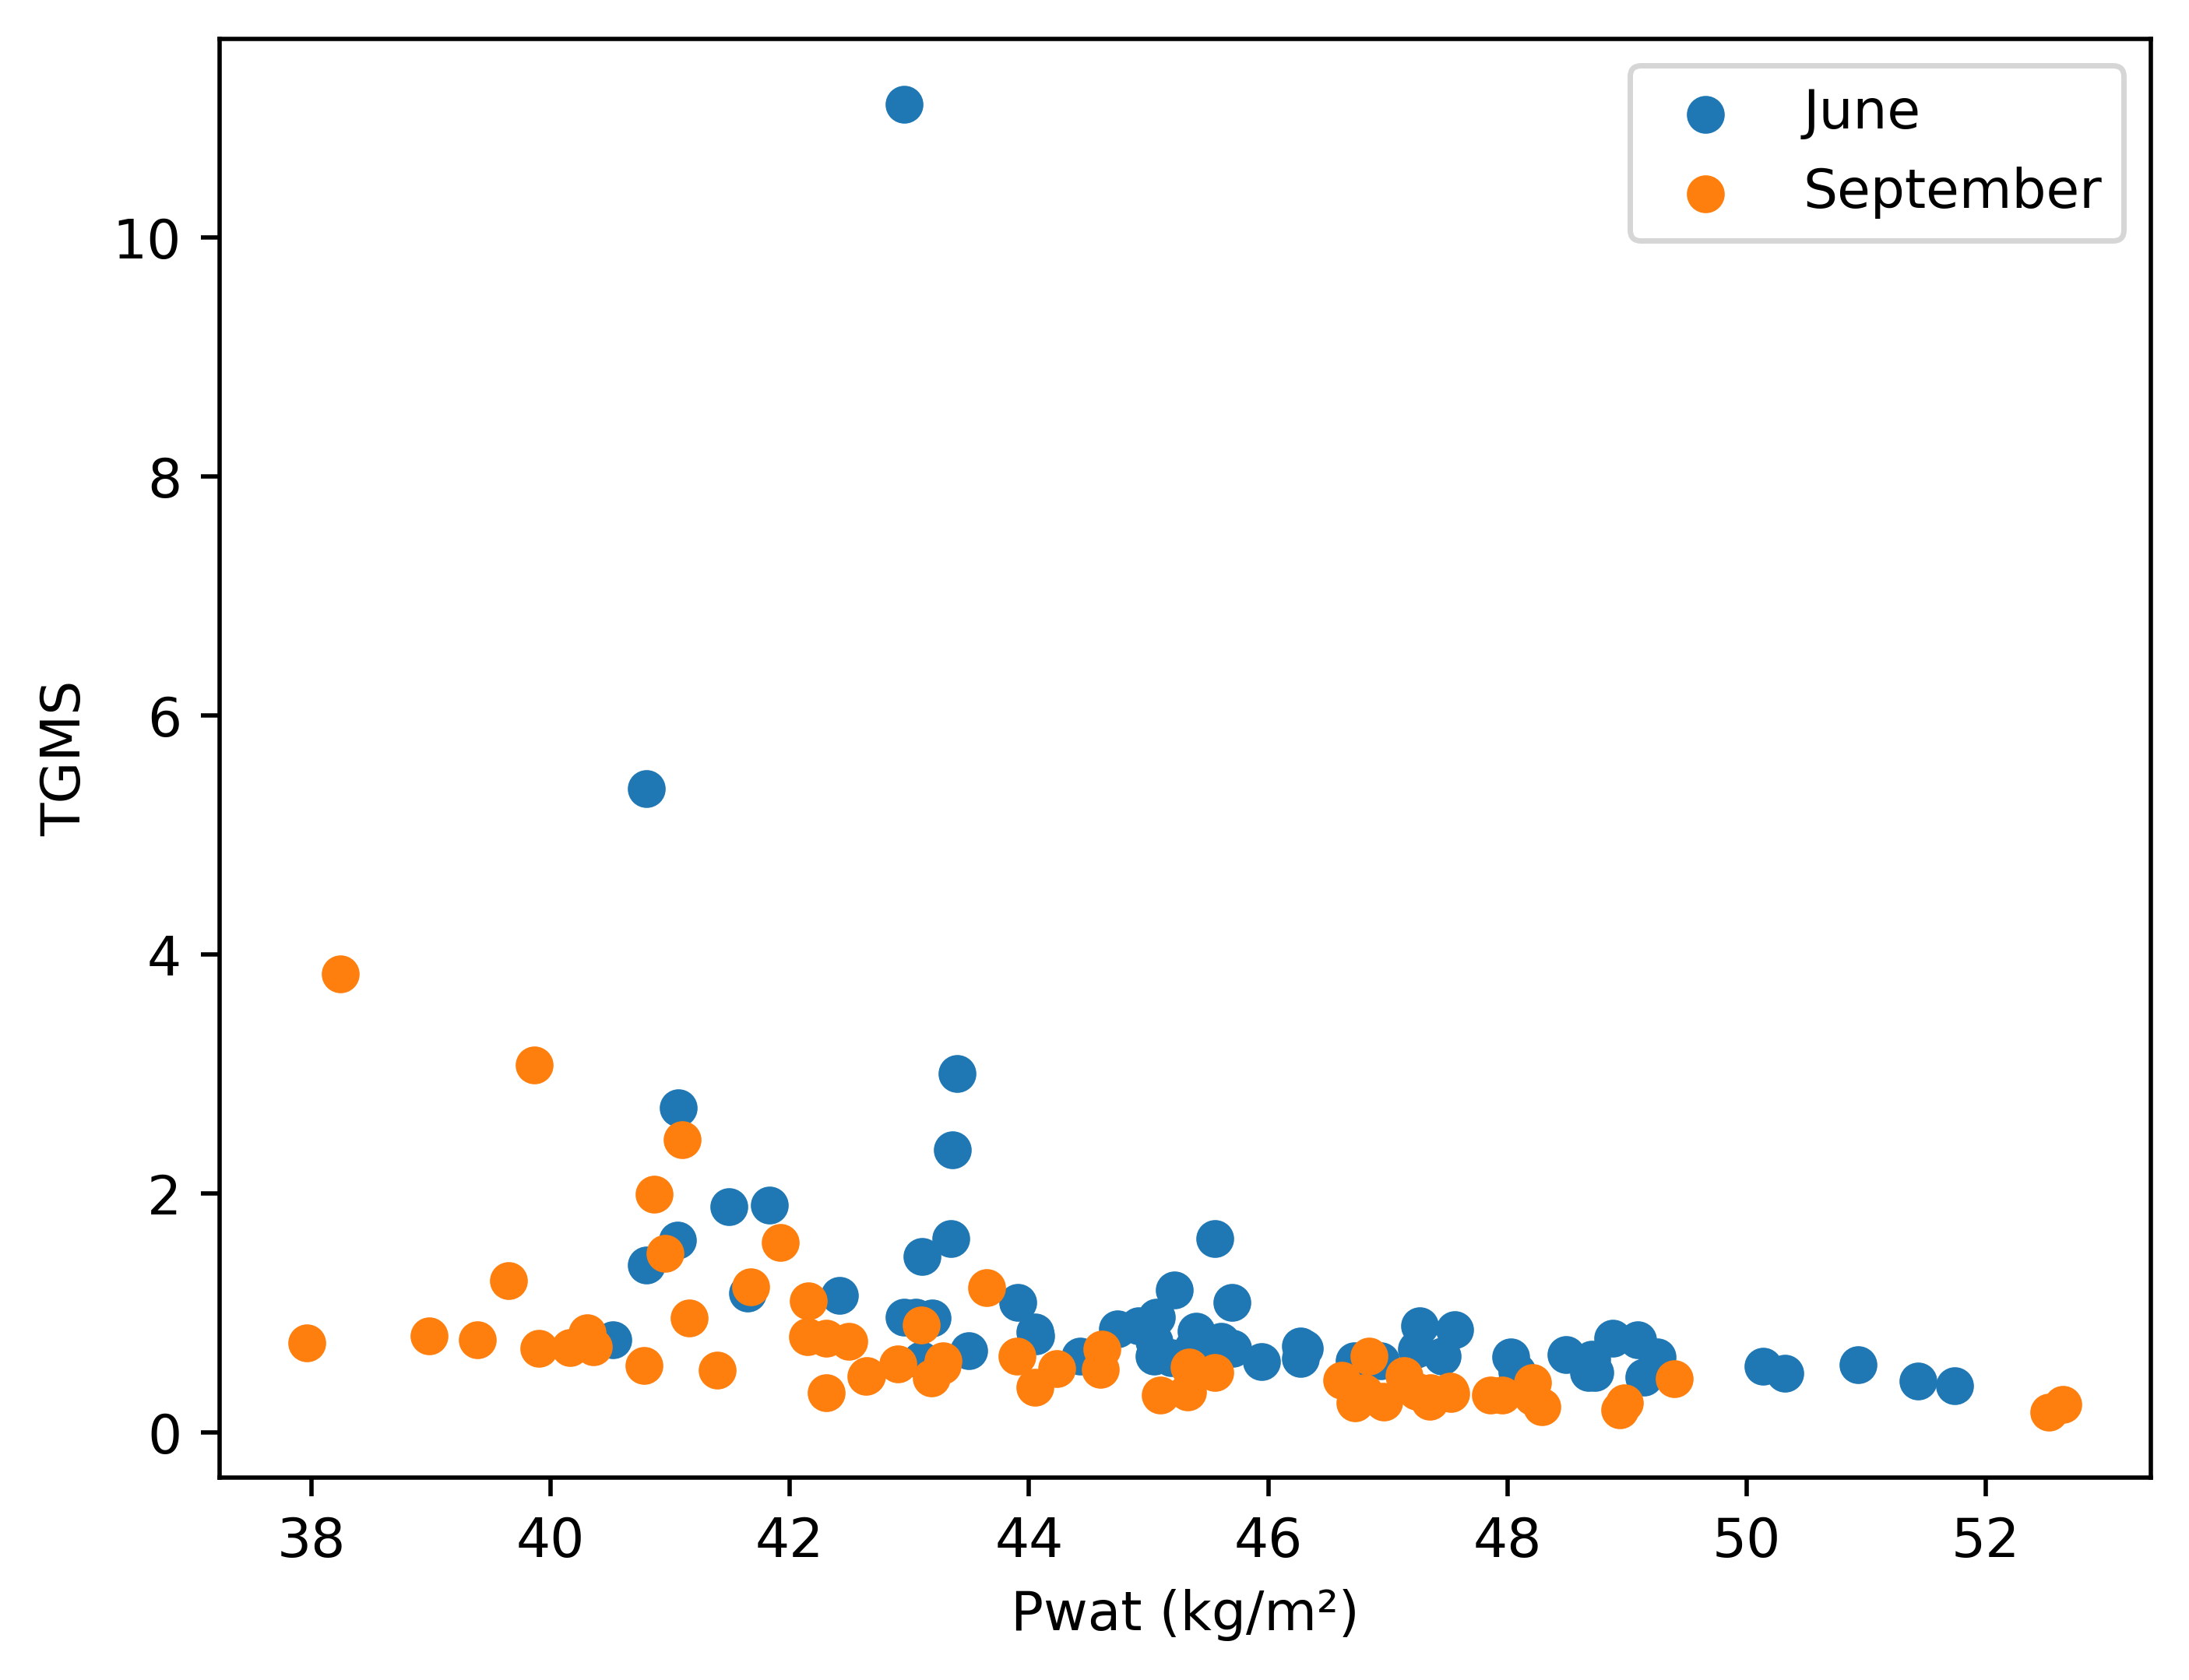

In [132]:
plt.scatter(Pwat, TGMS, label='June')
plt.scatter(Pwat1, TGMS1, label='September')
plt.xlabel('Pwat (kg/m\u00b2)')
plt.ylabel('TGMS')
plt.legend()

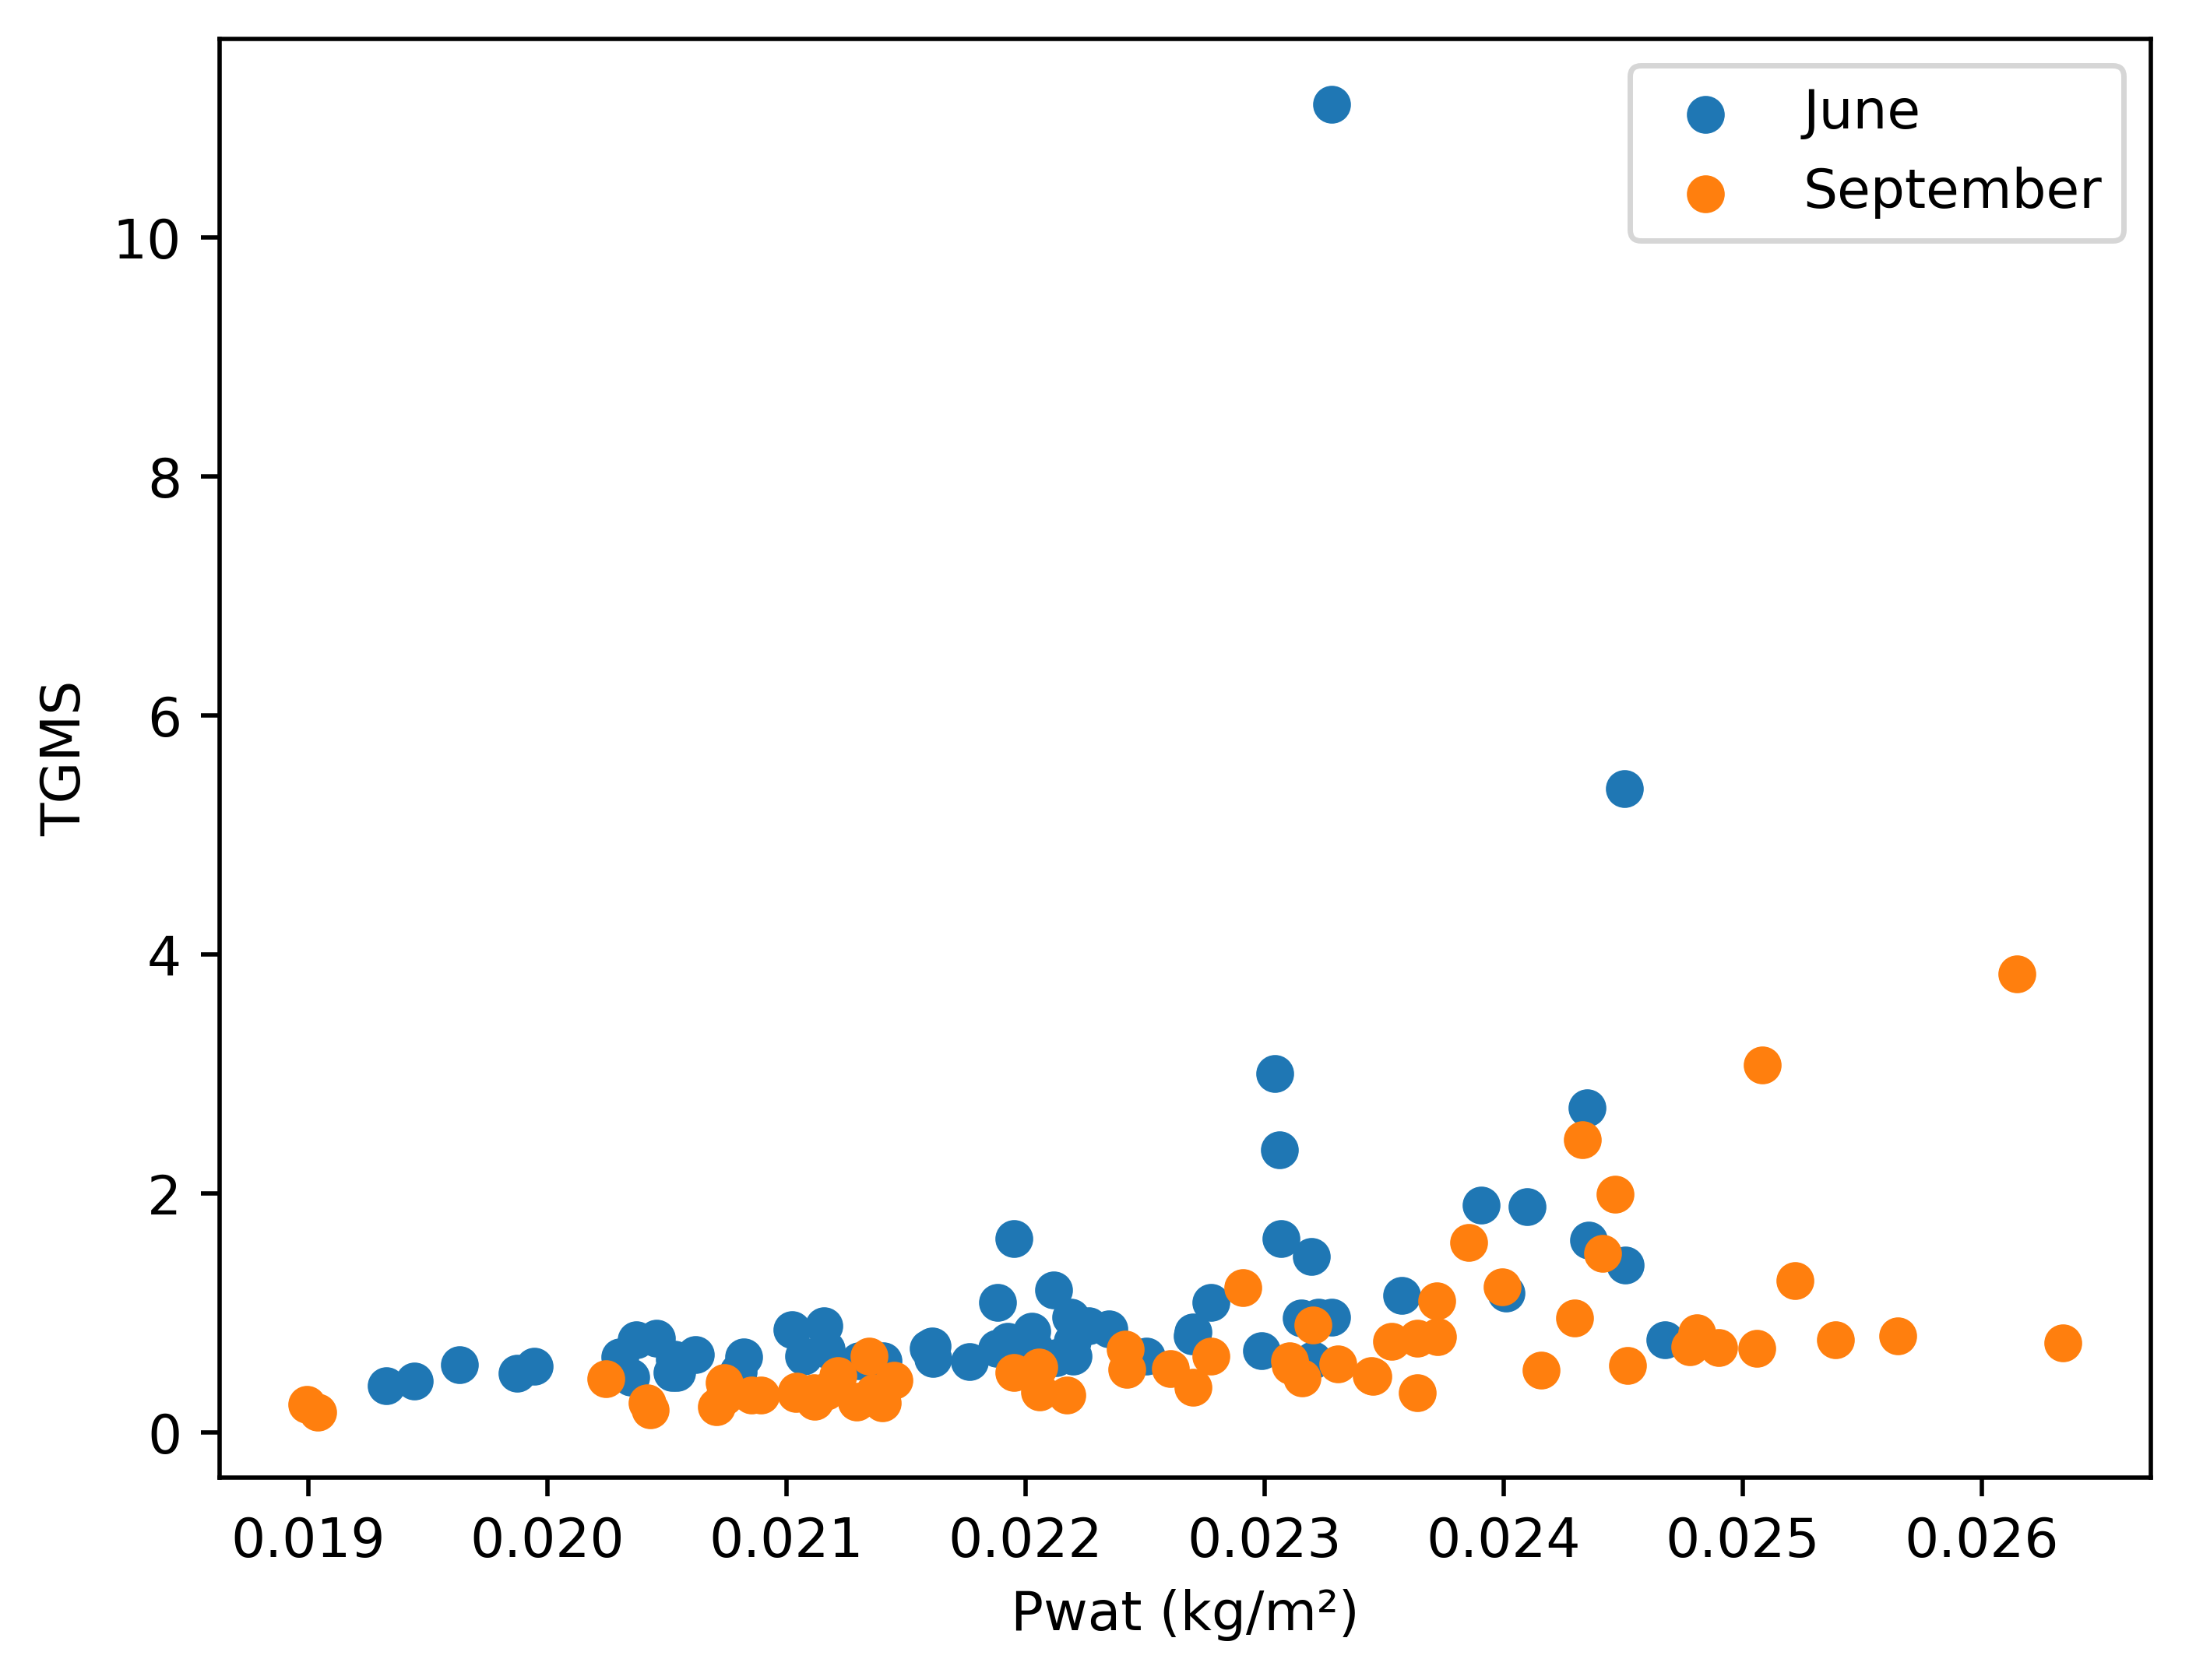

In [126]:
plt.scatter(1/Pwat, TGMS, label='June')
plt.scatter(1/Pwat1, TGMS1, label='September')
plt.xlabel('Pwat (kg/m\u00b2)')
plt.ylabel('TGMS')
plt.legend()

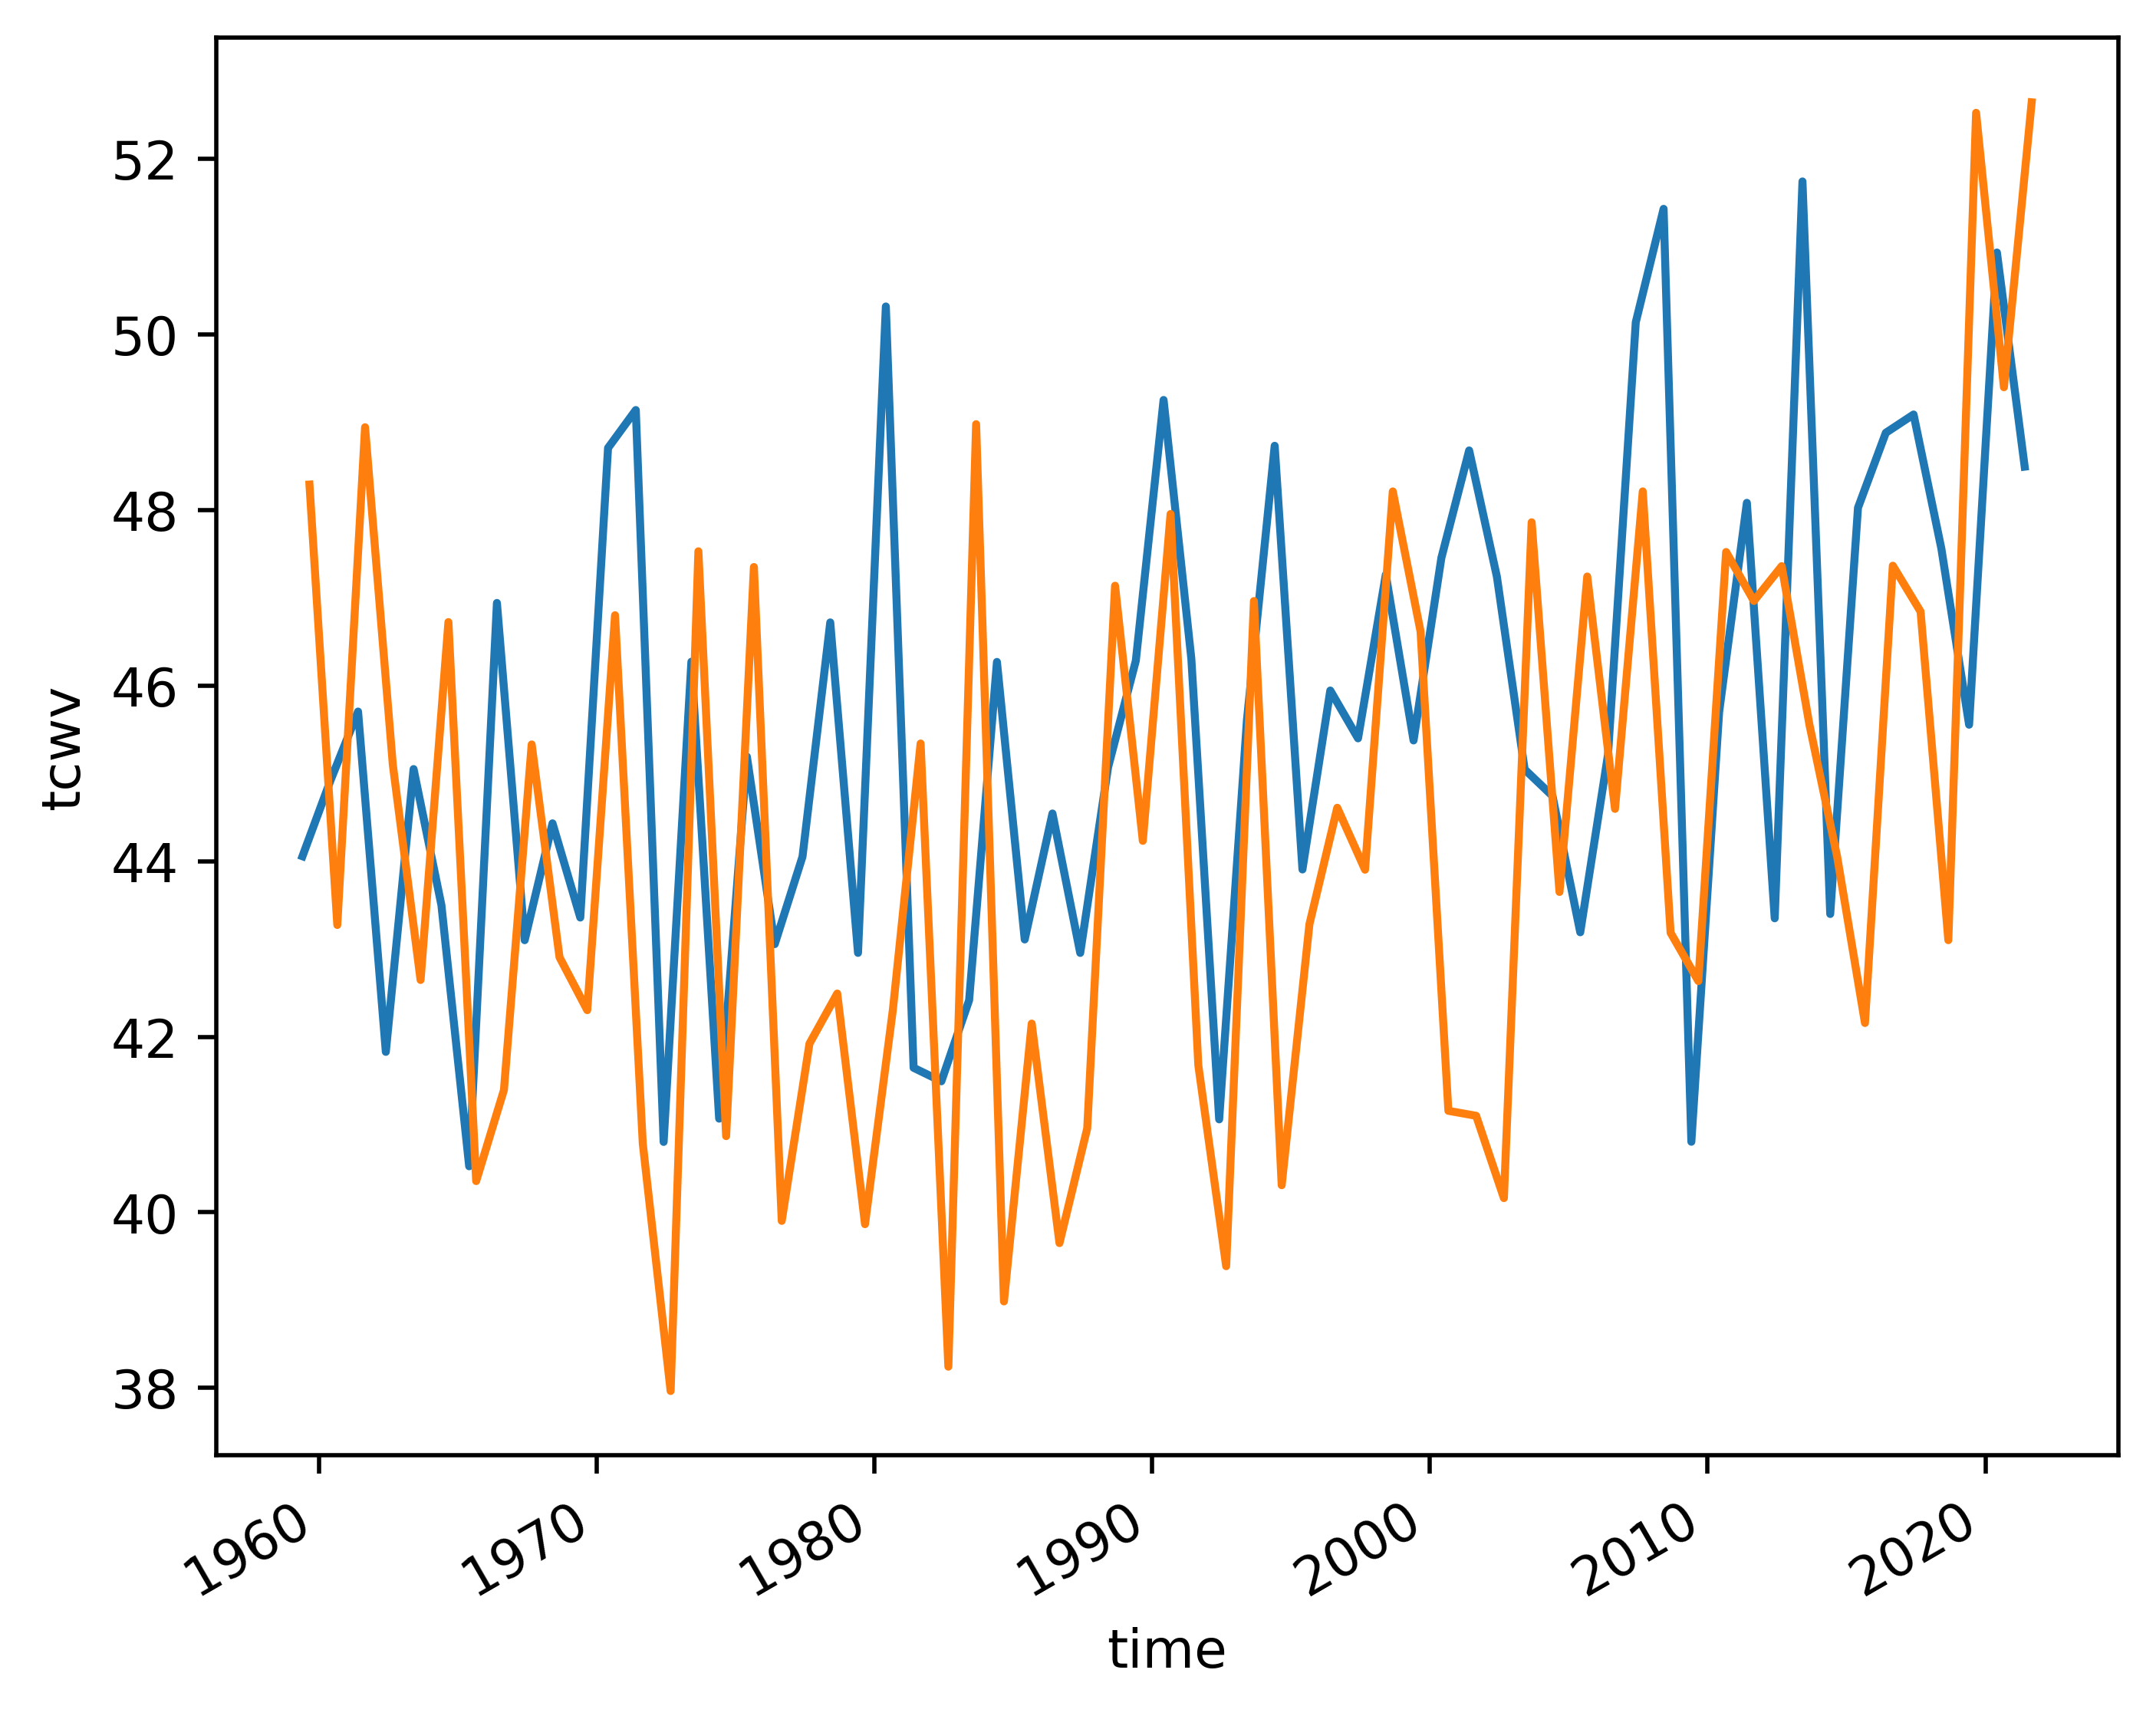

In [127]:
Pwat.plot()
Pwat1.plot()